In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [3]:
df=pd.read_excel('/content/cpcb4.xlsx')

In [4]:
df.shape

(22876, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22876 entries, 0 to 22875
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PM2.5        22876 non-null  float64
 1   PM10         22876 non-null  float64
 2   NO           22876 non-null  float64
 3   NO2          22876 non-null  float64
 4   NOx          22876 non-null  float64
 5   NH3          22876 non-null  float64
 6   SO2          22876 non-null  float64
 7   CO           22876 non-null  float64
 8   Ozone        22876 non-null  float64
 9   Benzene      22876 non-null  float64
 10  Toluene      22876 non-null  float64
 11  Eth-Benzene  22876 non-null  float64
 12  MP-Xylene    22876 non-null  float64
 13  RH           22876 non-null  float64
 14  WS           22876 non-null  float64
 15  WD           22876 non-null  float64
 16  SR           22876 non-null  float64
 17  BP           22876 non-null  float64
 18  VWS          22876 non-null  float64
 19  AT  

In [ ]:
#correlation of different parameter
df.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,Eth-Benzene,MP-Xylene,RH,WS,WD,SR,BP,VWS,AT
PM2.5,1.000000,0.950145,0.399390,0.227092,0.377647,-0.113220,0.532137,0.656386,-0.044599,0.389233,0.026696,0.119485,0.031869,-0.149018,-0.266573,0.179326,-0.167772,0.648283,-0.009653,-0.665992
PM10,0.950145,1.000000,0.400293,0.201274,0.360287,-0.134218,0.531689,0.668252,0.024196,0.465670,0.113549,0.222790,0.136409,-0.243833,-0.277482,0.168065,-0.158619,0.660402,0.001648,-0.619845
NO,0.399390,0.400293,1.000000,0.268601,0.723113,0.328041,0.097660,0.616184,-0.244190,0.367450,0.102780,0.070081,0.008040,0.092569,-0.164601,0.054149,-0.103936,0.149873,-0.003610,-0.311051
NO2,0.227092,0.201274,0.268601,1.000000,0.842111,0.371475,0.221037,0.229055,-0.092284,0.206095,0.224155,0.113744,0.204162,-0.126927,-0.242925,0.161429,-0.113262,0.196126,-0.049128,-0.117568
NOx,0.377647,0.360287,0.723113,0.842111,1.000000,0.435177,0.204356,0.487235,-0.197955,0.341009,0.209292,0.112154,0.145789,-0.040474,-0.260240,0.143851,-0.134032,0.225139,-0.033326,-0.249799
NH3,-0.113220,-0.134218,0.328041,0.371475,0.435177,1.000000,-0.113709,-0.001876,-0.088208,0.086159,0.087121,-0.154896,-0.020548,0.067049,-0.168959,0.104572,0.009939,-0.123634,0.013059,0.192365
SO2,0.532137,0.531689,0.097660,0.221037,0.204356,-0.113709,1.000000,0.266430,0.227349,0.161981,0.046586,0.060851,0.075879,-0.451078,-0.186552,0.220385,0.012219,0.492888,-0.006131,-0.197473
CO,0.656386,0.668252,0.616184,0.229055,0.487235,-0.001876,0.266430,1.000000,-0.325007,0.566478,0.218948,0.307522,0.164507,0.064837,-0.300723,0.104854,-0.206593,0.346412,-0.036259,-0.531348
Ozone,-0.044599,0.024196,-0.244190,-0.092284,-0.197955,-0.088208,0.227349,-0.325007,1.000000,-0.130151,-0.040040,-0.095977,-0.037787,-0.735658,0.109951,-0.005330,0.327647,0.089219,0.050160,0.428777
Benzene,0.389233,0.465670,0.367450,0.206095,0.341009,0.086159,0.161981,0.566478,-0.130151,1.000000,0.767948,0.690548,0.708782,-0.051010,-0.229191,0.068425,-0.170362,0.298467,-0.001611,-0.299586


<Axes: >

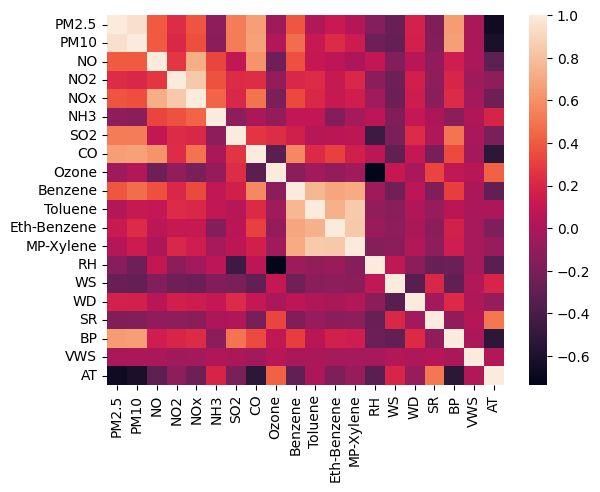

In [ ]:
sns.heatmap(df.corr())

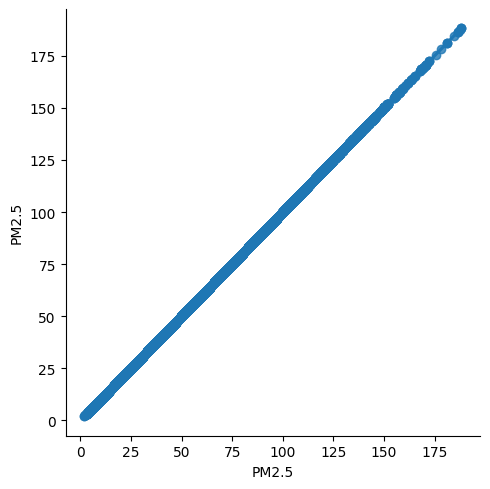

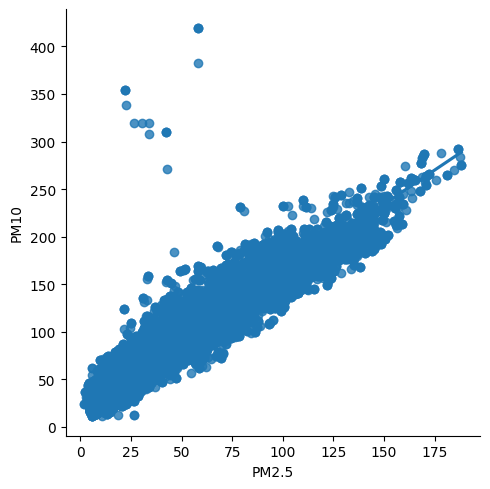

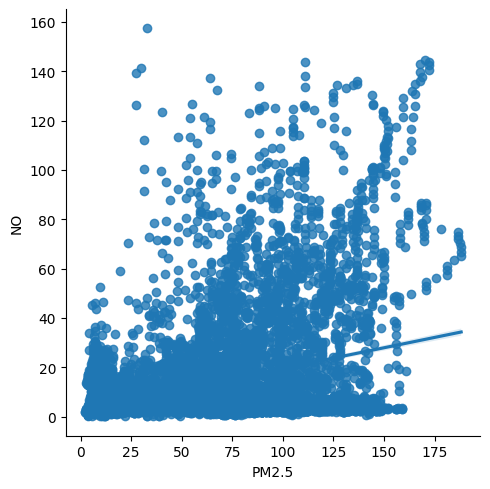

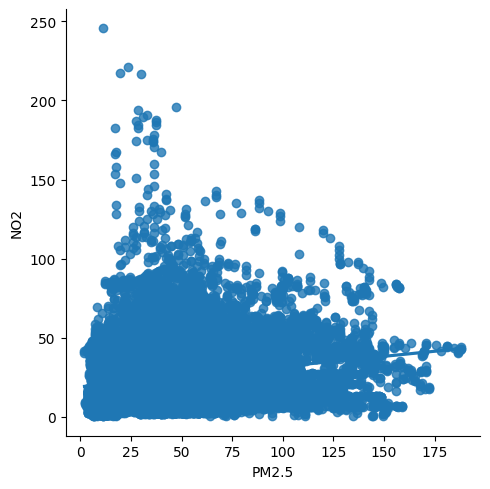

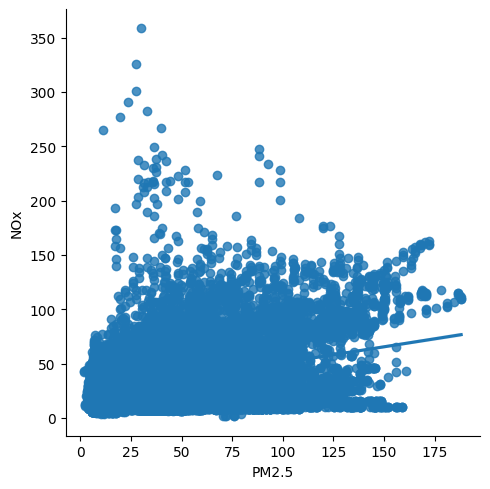

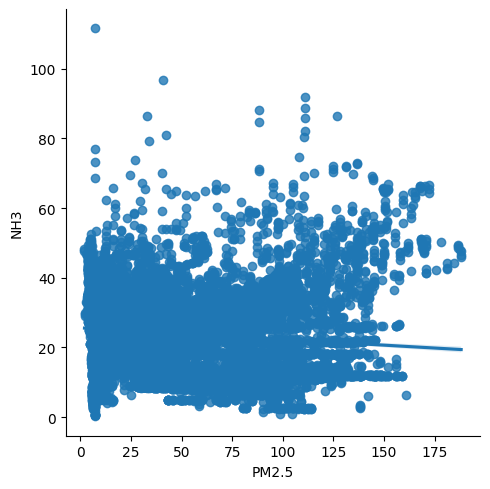

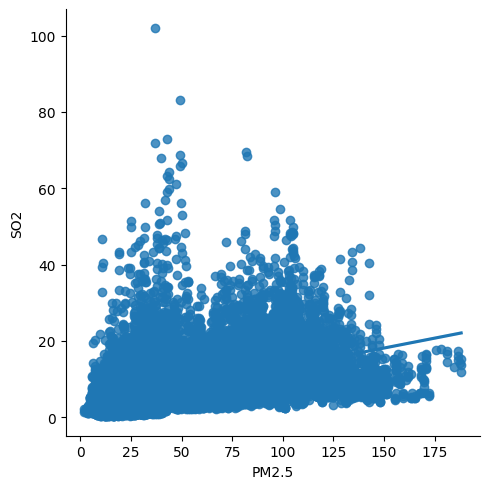

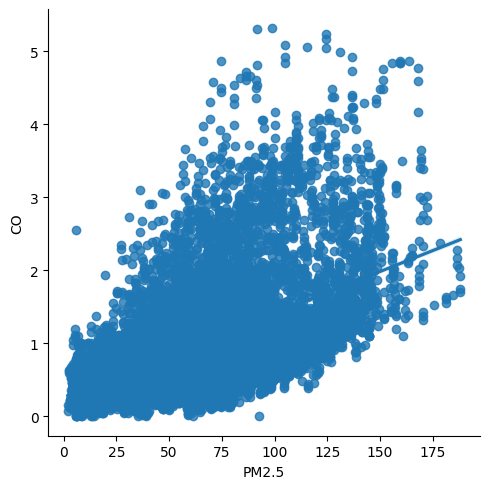

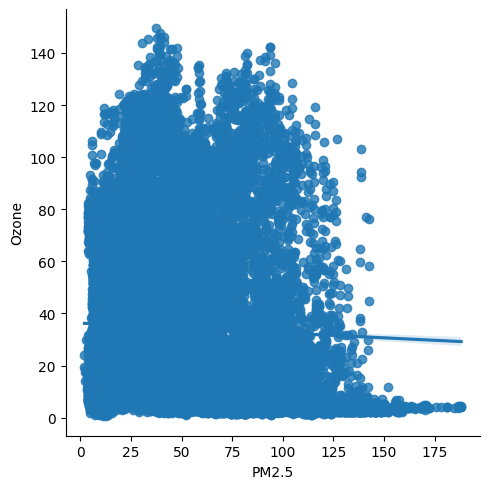

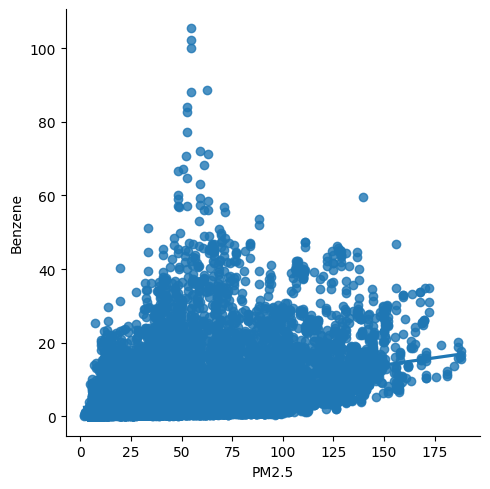

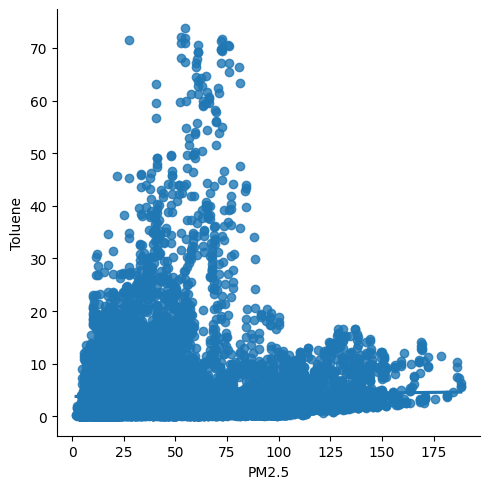

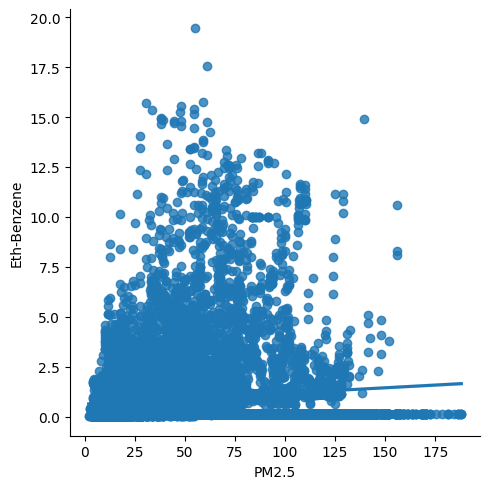

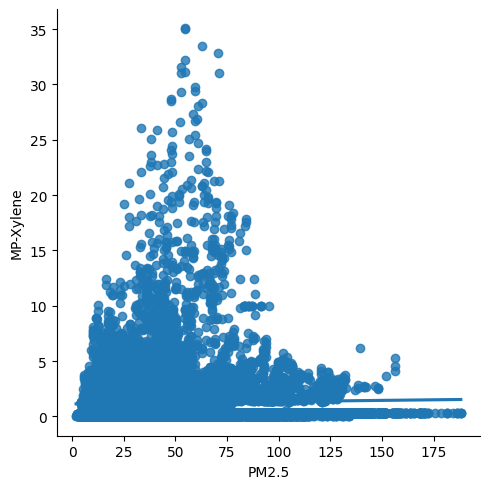

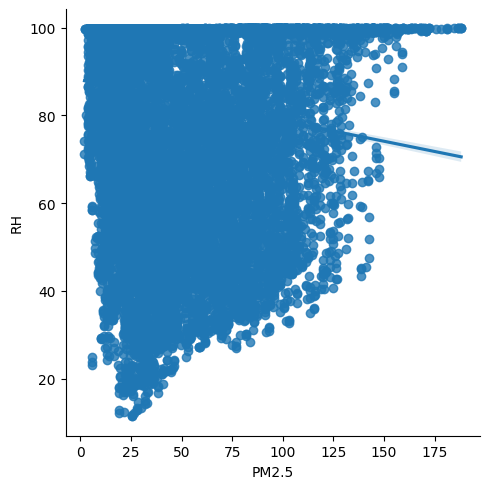

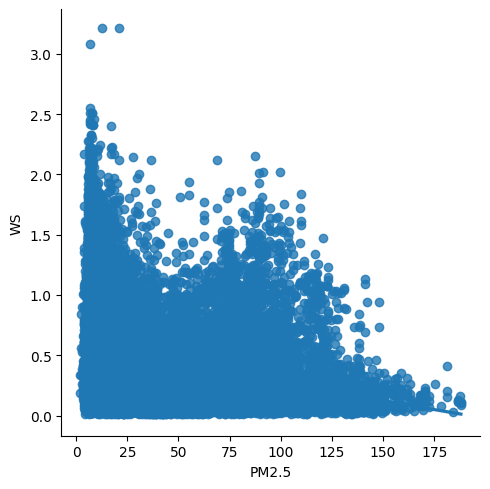

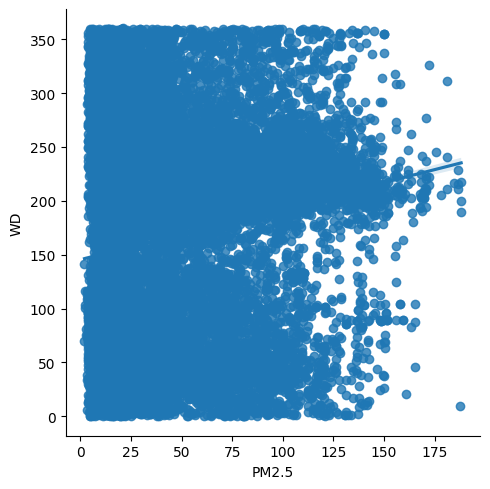

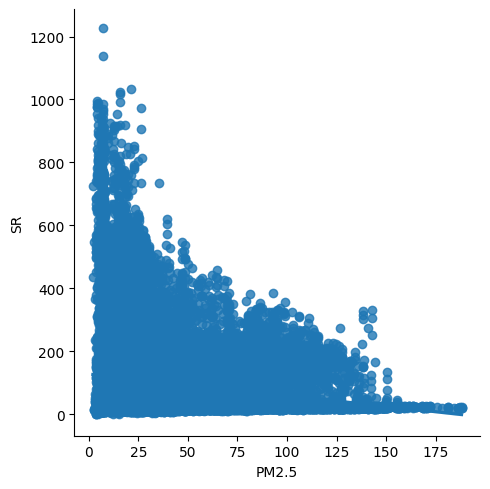

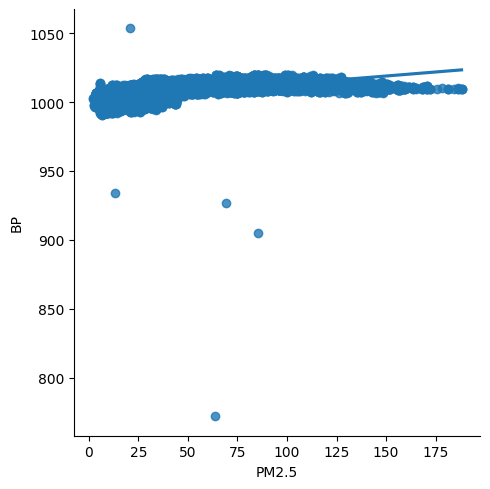

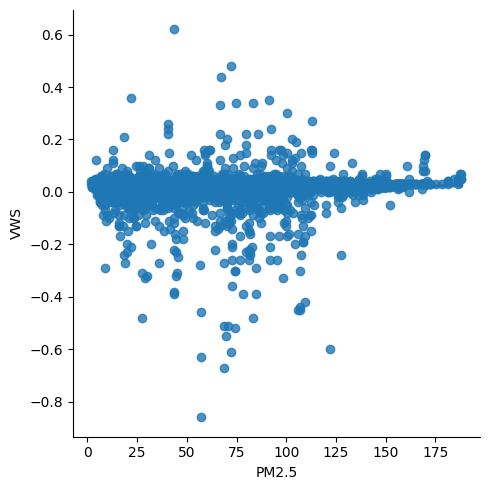

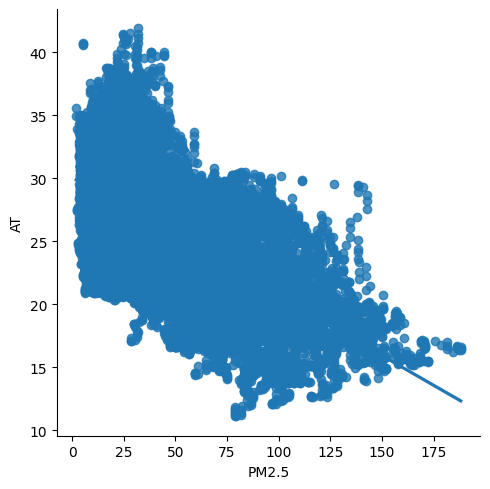

In [ ]:
for col in df.columns:
  sns.lmplot(x='PM2.5',y=col,data=df)



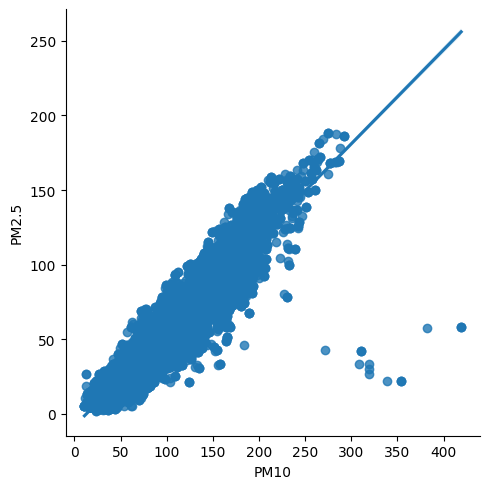

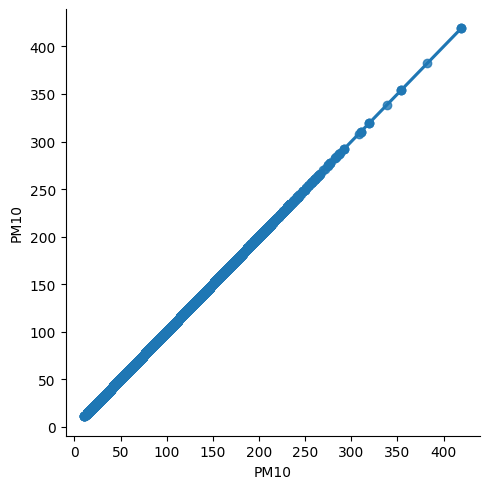

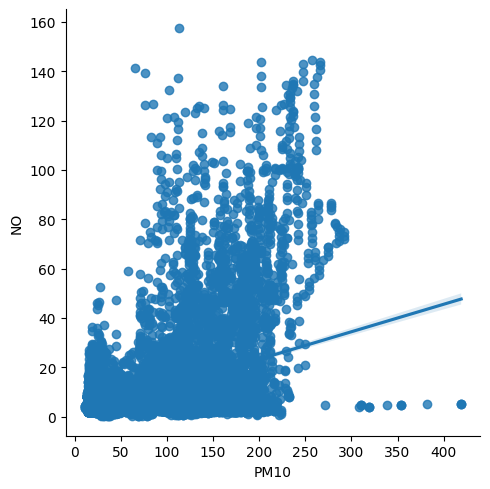

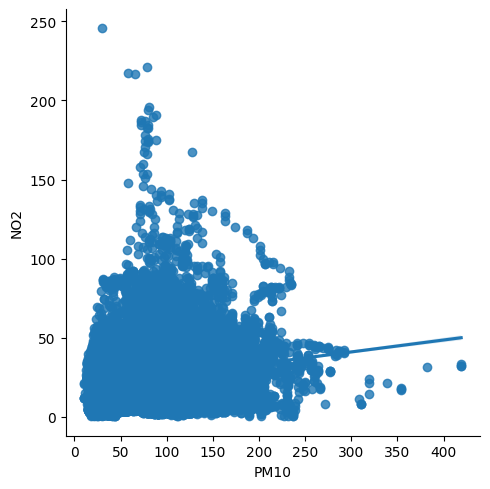

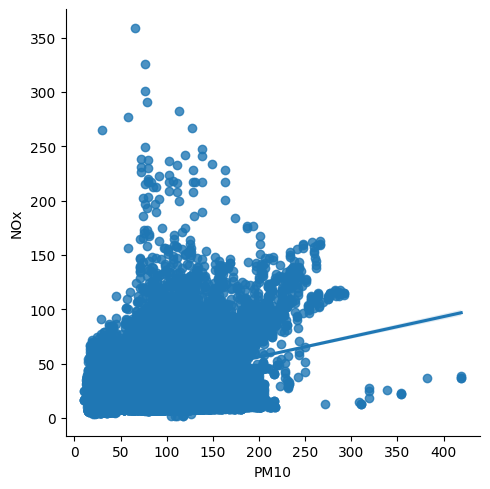

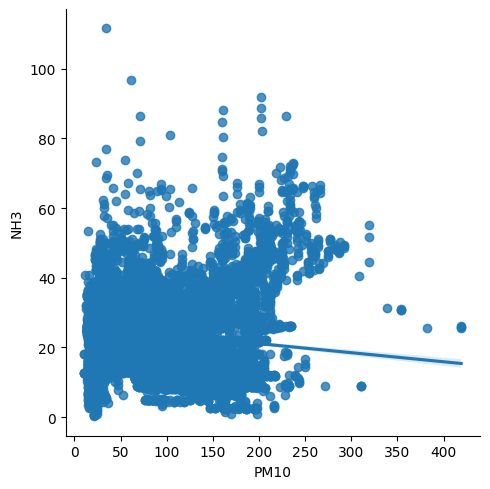

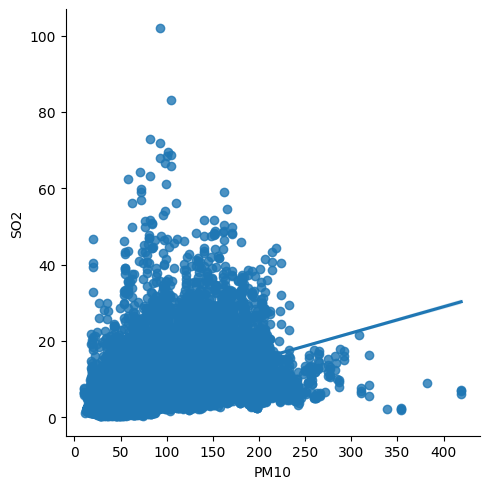

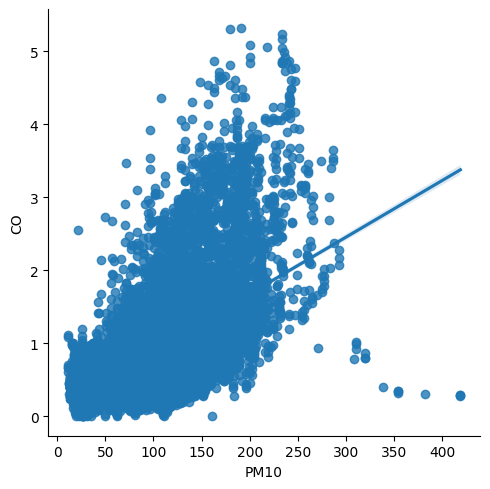

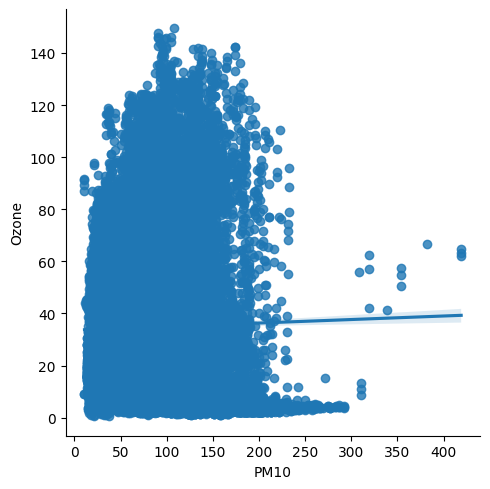

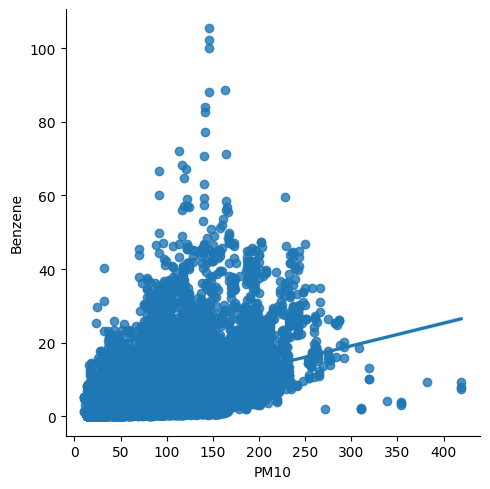

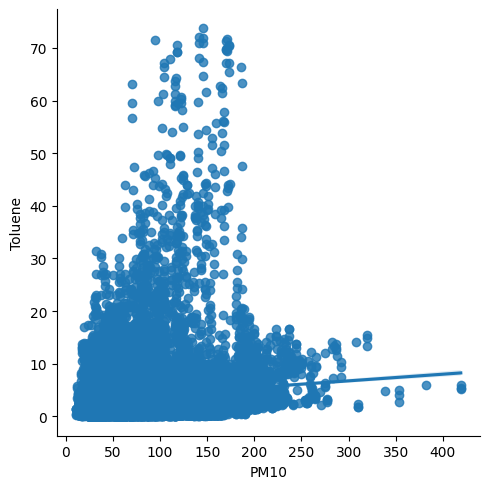

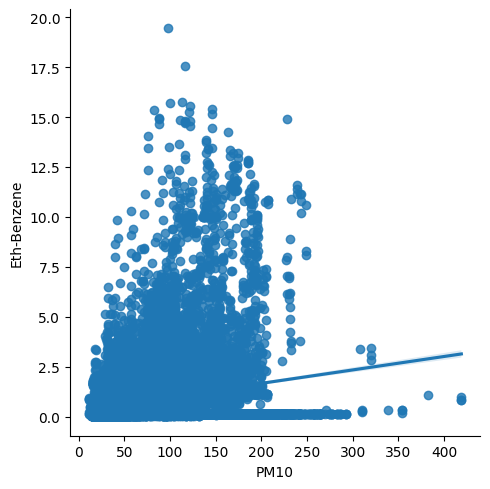

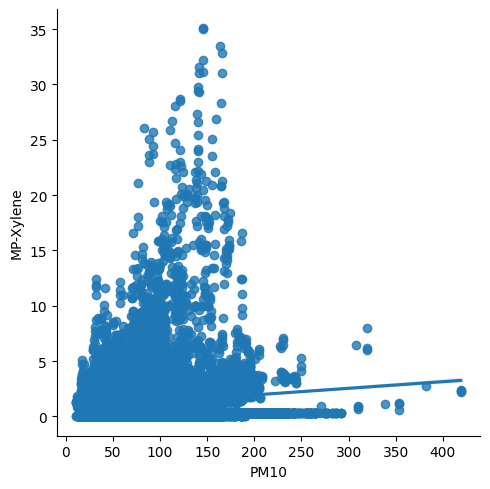

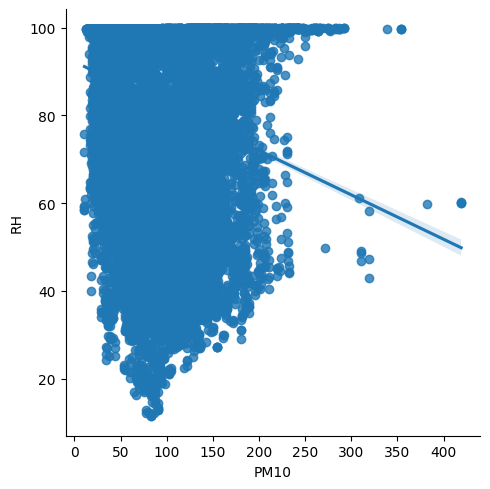

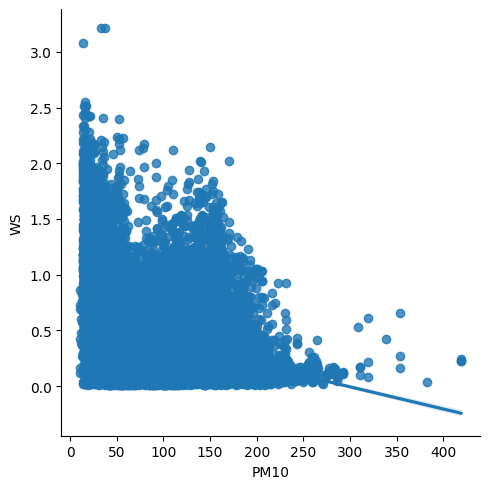

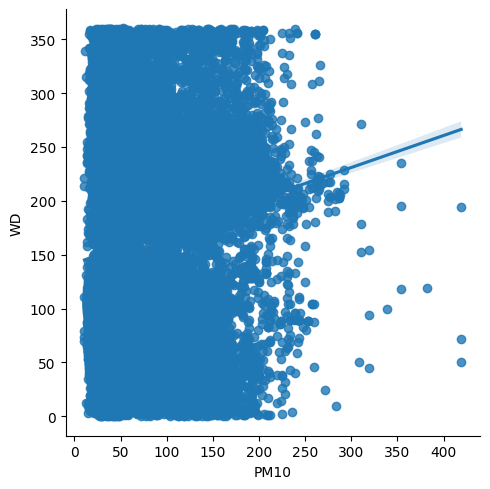

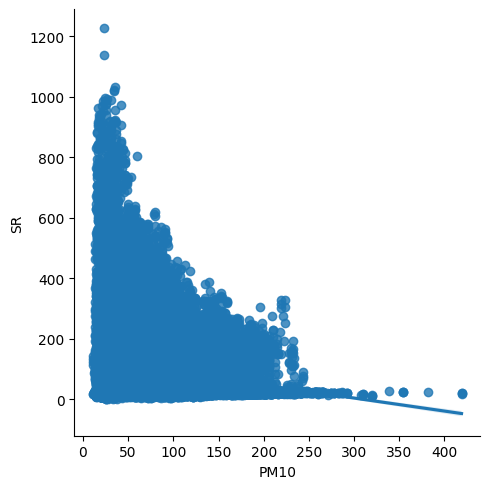

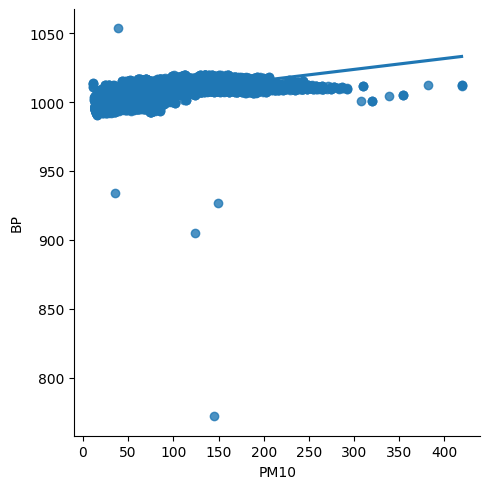

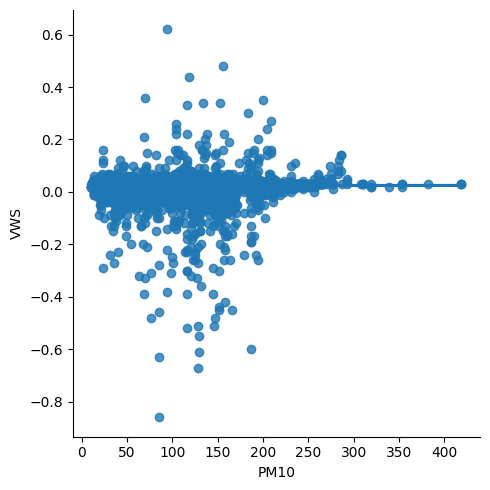

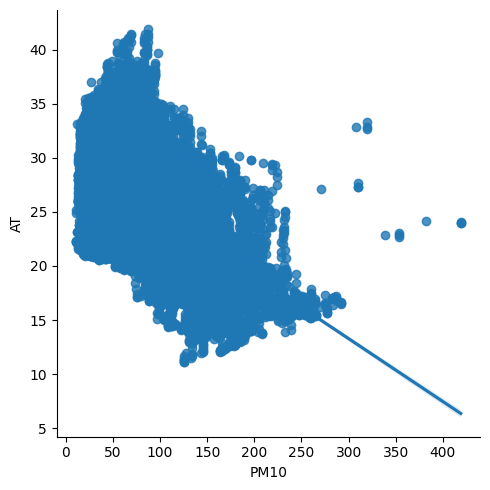

In [ ]:
for col in df.columns:
  sns.lmplot(x='PM10',y=col,data=df)

<ipython-input-16-26ee55ece594>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


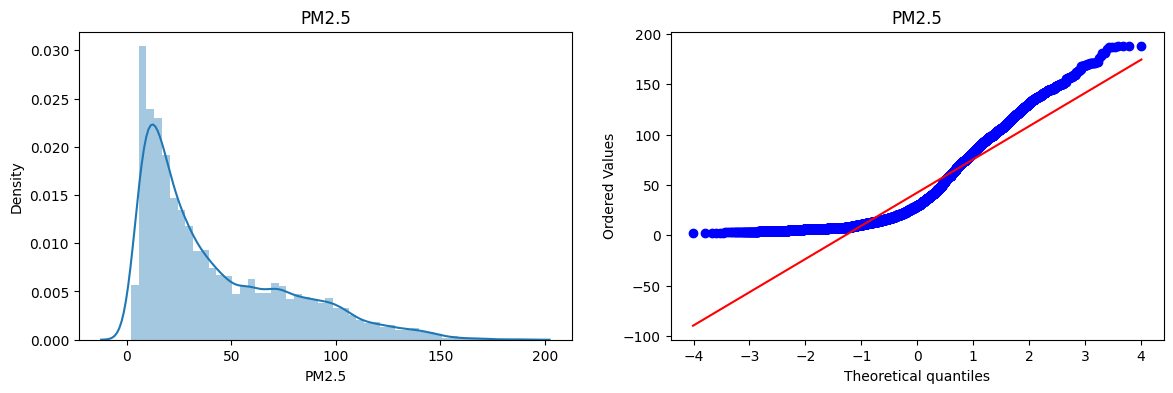

<ipython-input-16-26ee55ece594>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


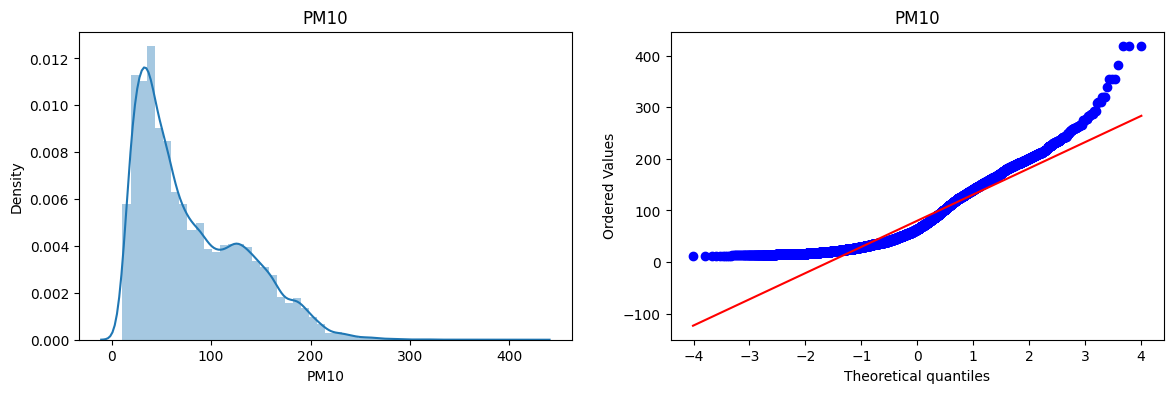

<ipython-input-16-26ee55ece594>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


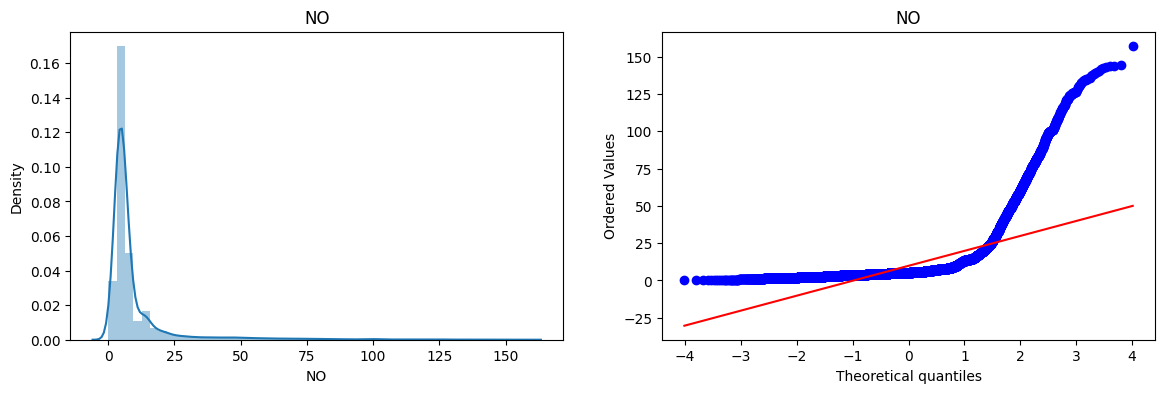

<ipython-input-16-26ee55ece594>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


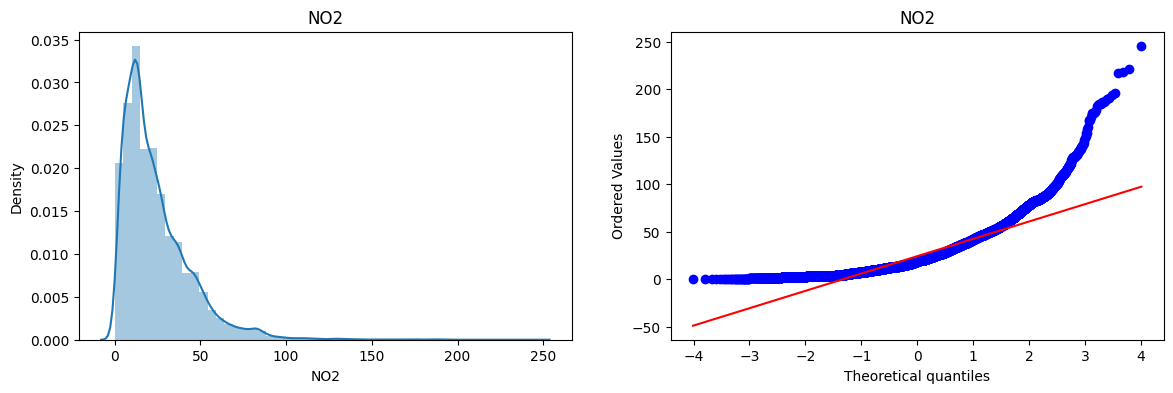

<ipython-input-16-26ee55ece594>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


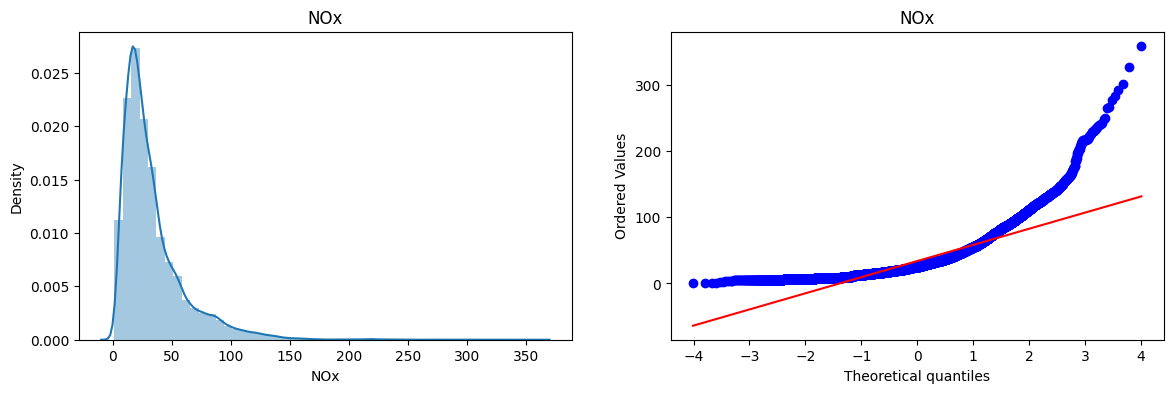

<ipython-input-16-26ee55ece594>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


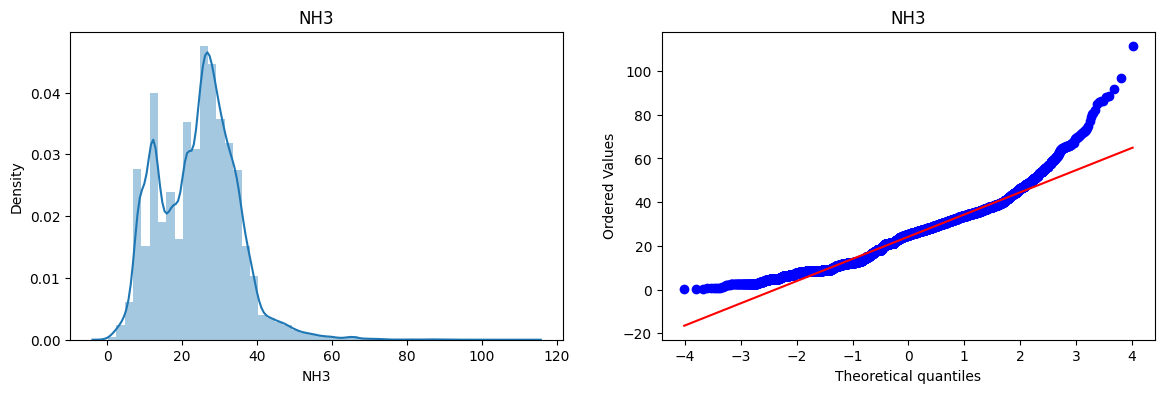

<ipython-input-16-26ee55ece594>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


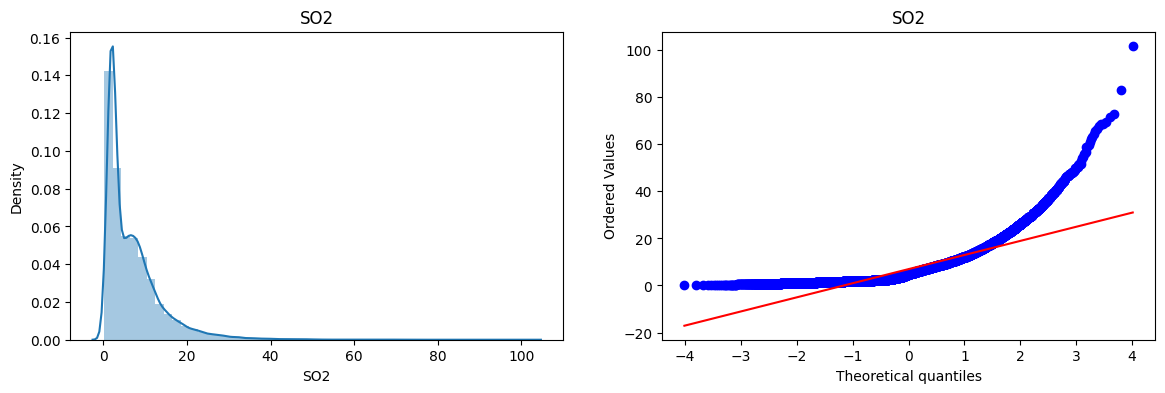

<ipython-input-16-26ee55ece594>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


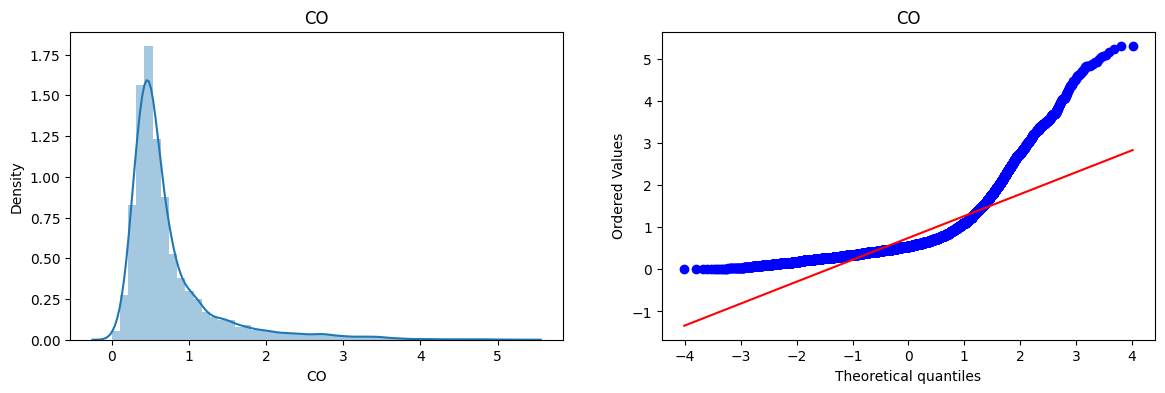

<ipython-input-16-26ee55ece594>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


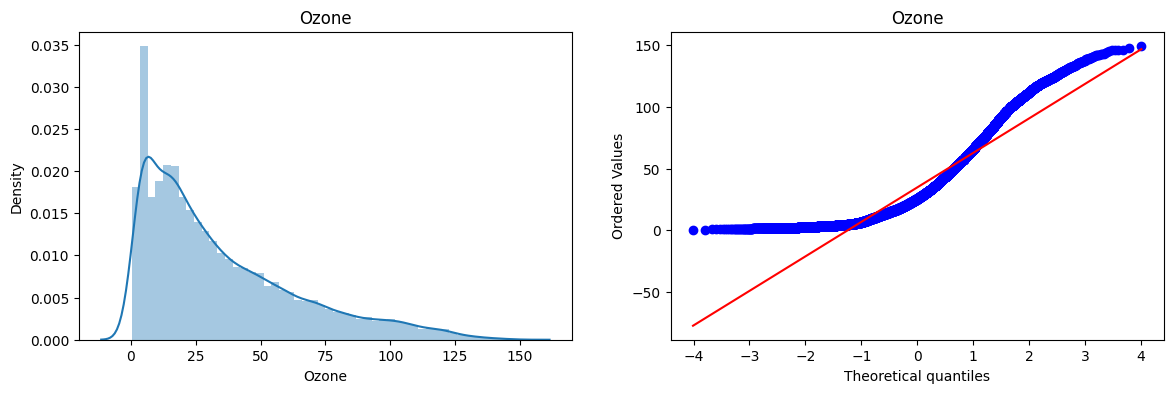

<ipython-input-16-26ee55ece594>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


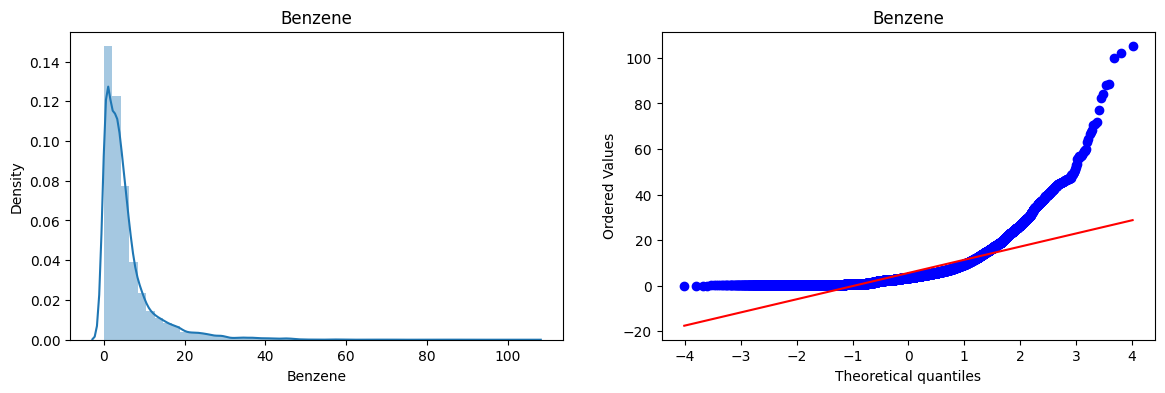

<ipython-input-16-26ee55ece594>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


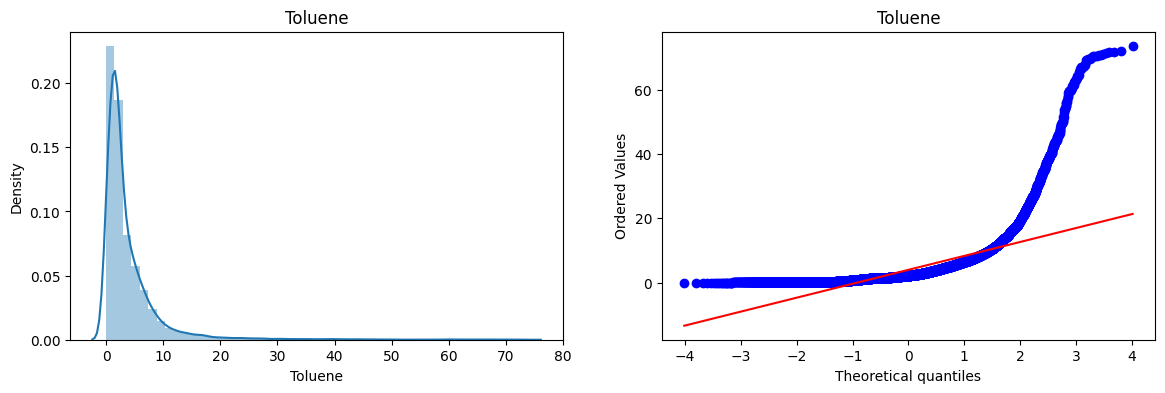

<ipython-input-16-26ee55ece594>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


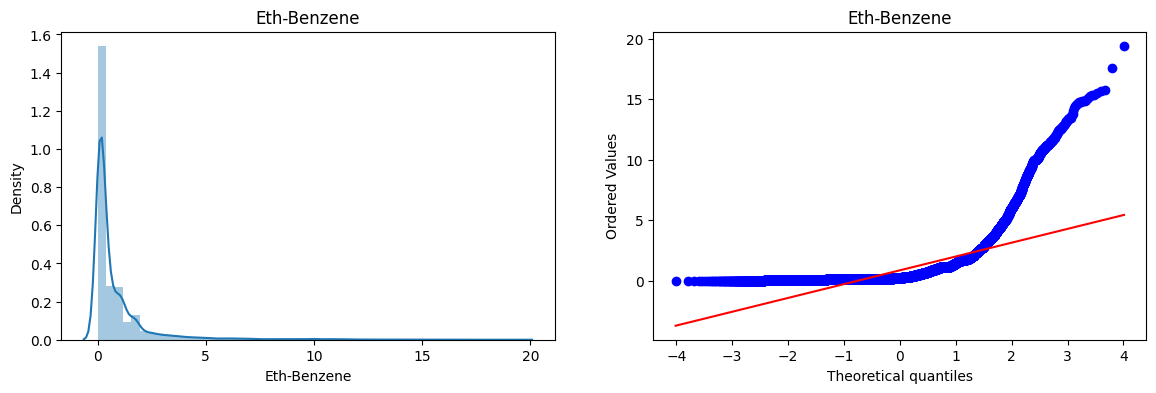

<ipython-input-16-26ee55ece594>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


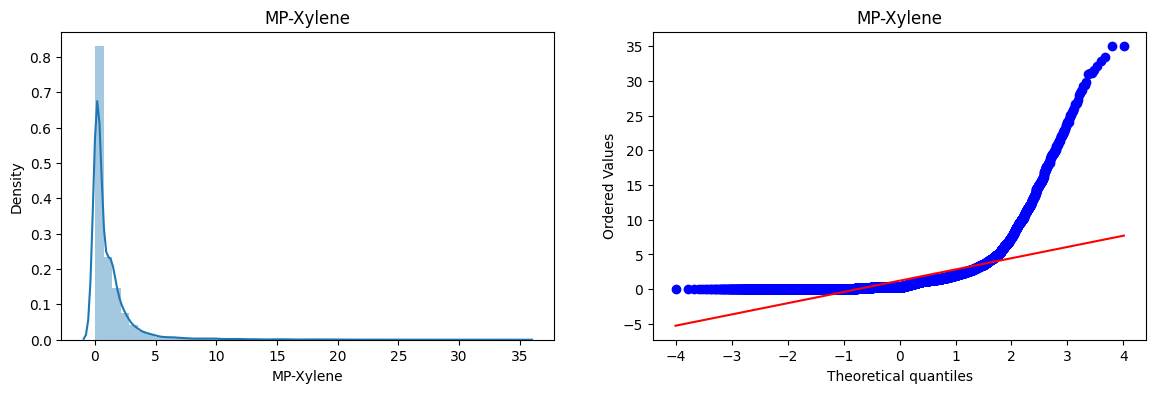

<ipython-input-16-26ee55ece594>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


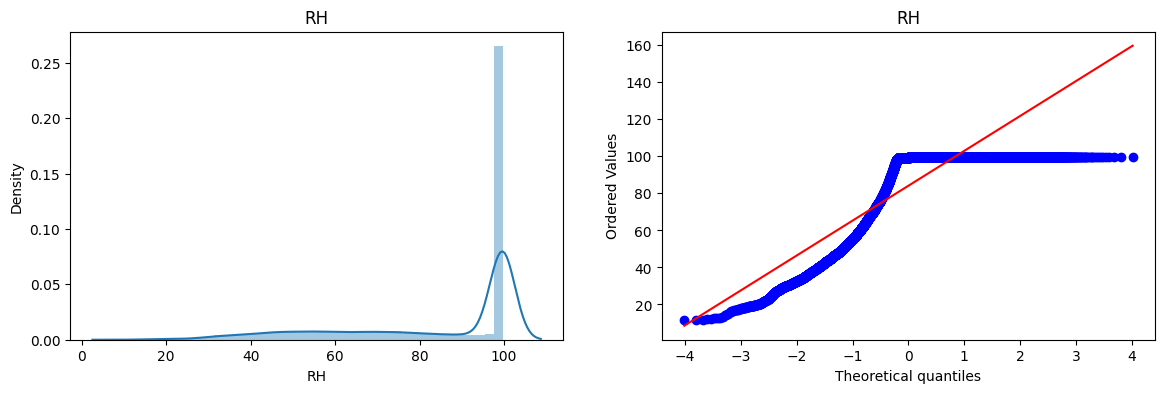

<ipython-input-16-26ee55ece594>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


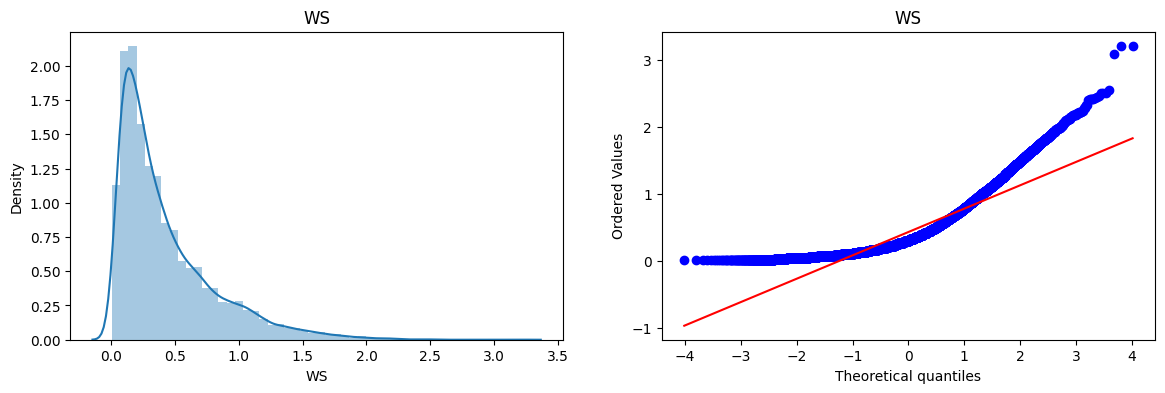

<ipython-input-16-26ee55ece594>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


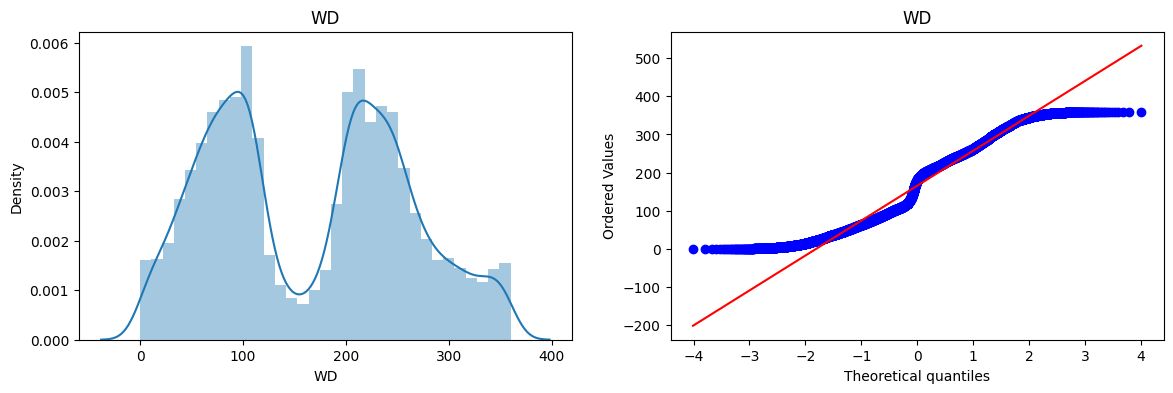

<ipython-input-16-26ee55ece594>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


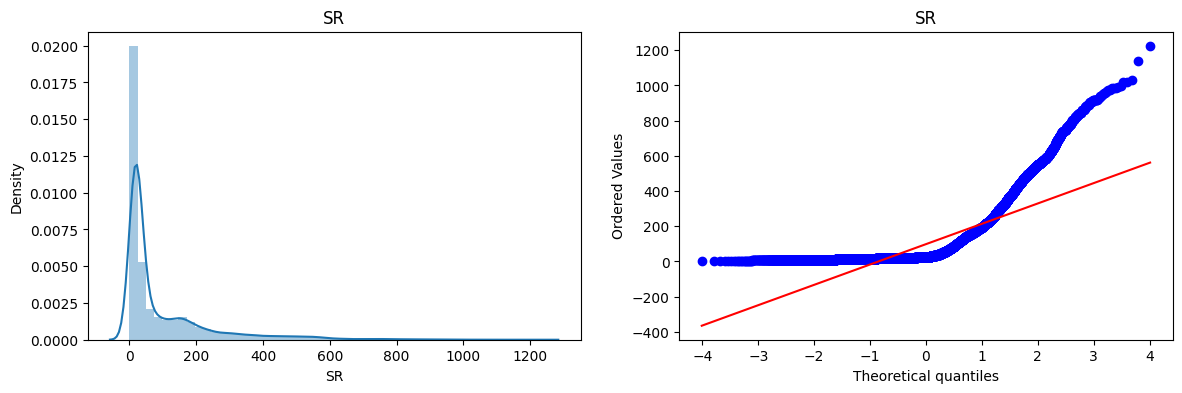

<ipython-input-16-26ee55ece594>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


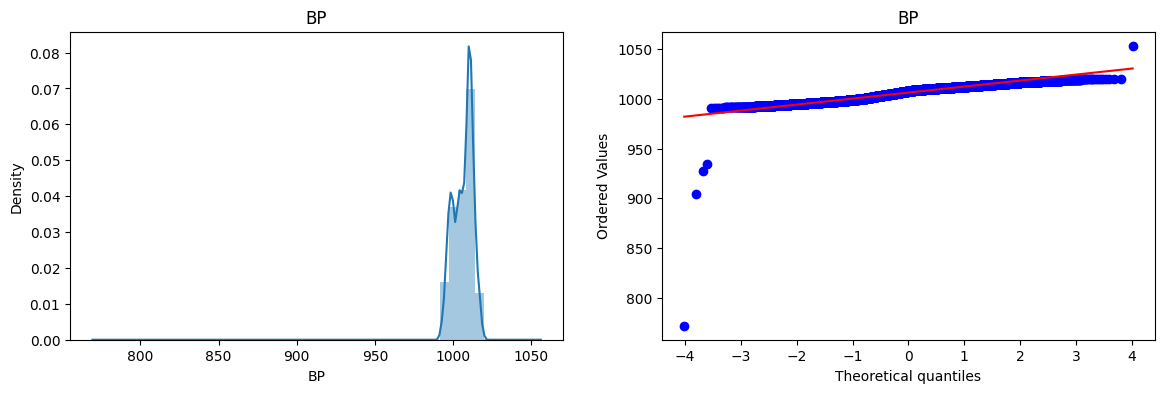

<ipython-input-16-26ee55ece594>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


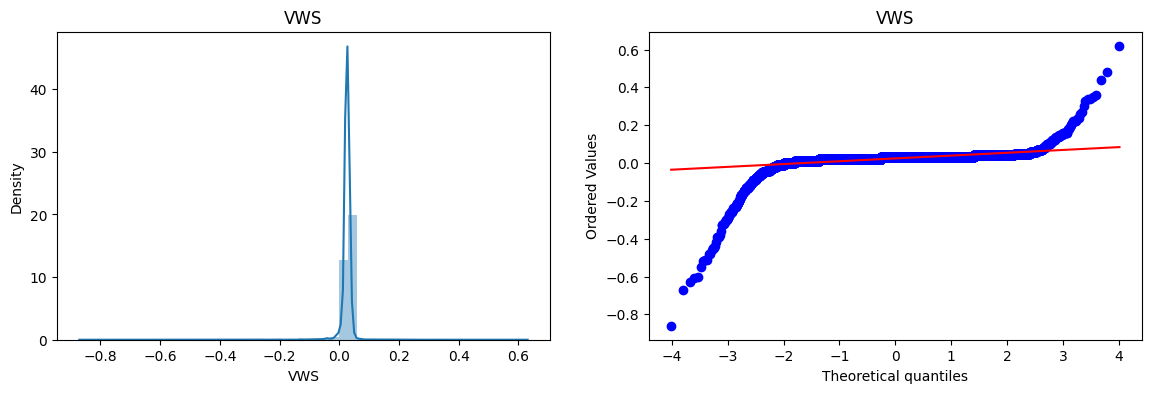

<ipython-input-16-26ee55ece594>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


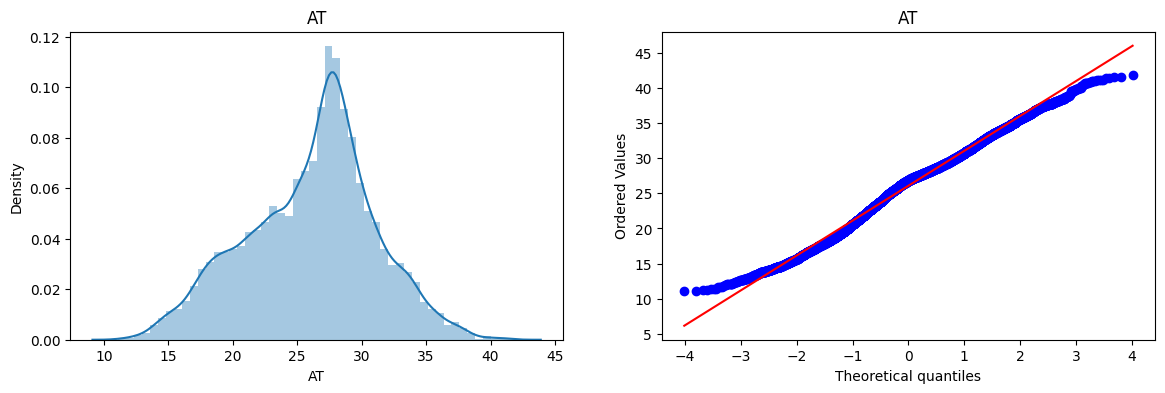

In [ ]:
for col in df.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

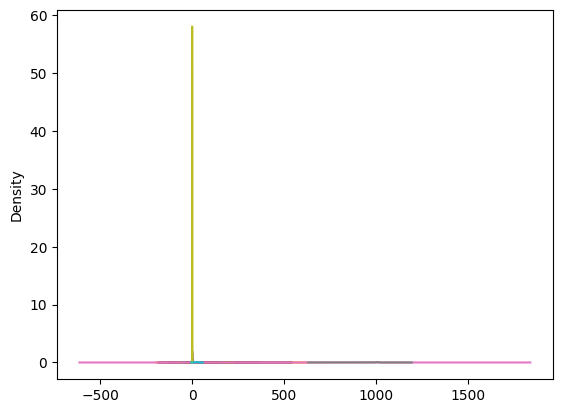

In [ ]:
for col in df.columns:
  df[col].plot.density()
plt.show()

In [ ]:
df.nunique()

PM2.5           1409
PM10            1988
NO               930
NO2             1066
NOx             1407
NH3              853
SO2              593
CO               436
Ozone           8420
Benzene         2665
Toluene         2072
Eth-Benzene      938
MP-Xylene       1113
RH              5401
WS               235
WD             15567
SR              4228
BP               296
VWS               82
AT              2498
dtype: int64

In [6]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,2:],df.iloc[:,0:2],test_size=0.2)

In [7]:

x_train

,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,Eth-Benzene,MP-Xylene,RH,WS,WD,SR,BP,VWS,AT
9227,76.5,10.1,86.6,53.6,20.6,1.46,4.31,18.58,4.18,0.11,0.28,83.53,0.34,211.74,21.5,1010.6,0.03,18.86
6523,3.6,20.8,24.4,17.9,8.1,0.61,78.81,0.55,0.19,0.11,0.08,45.16,0.16,1.28,82.8,1009.4,0.02,29.74
1347,2.0,4.7,6.7,15.3,1.5,0.52,10.23,0.51,2.40,0.23,0.15,99.75,0.93,58.95,12.8,995.6,0.03,27.25
9467,21.6,46.3,67.9,25.2,9.5,1.52,6.86,4.87,1.42,0.11,0.28,64.87,0.10,205.70,16.4,1010.8,0.03,18.18
5113,3.7,25.1,28.9,20.7,8.1,0.41,61.32,0.43,0.12,0.11,0.08,55.75,0.03,334.14,63.3,1008.4,0.02,29.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,2.3,3.5,5.8,20.7,2.3,0.69,26.62,0.69,4.94,0.28,0.18,98.94,0.39,172.74,326.4,999.6,0.02,34.57
20038,4.9,14.5,19.4,28.7,1.1,0.46,23.22,2.49,2.40,0.12,0.63,99.69,0.55,346.38,148.5,1005.8,0.02,30.31
7558,3.2,6.7,9.9,11.8,15.0,0.65,111.02,2.72,1.27,0.11,0.28,36.04,0.12,199.85,269.5,1010.6,0.04,27.59
730,17.9,11.0,28.8,16.7,1.7,0.47,9.39,0.28,0.90,0.15,0.08,98.96,1.15,104.07,33.7,999.0,0.04,31.16


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr_PM2_5= LinearRegression()
lr_PM10 = LinearRegression()

In [10]:
y_train_PM2_5=y_train.iloc[:,0]
y_train_PM10=y_train.iloc[:,-1]

In [11]:
y_test_PM2_5=y_test.iloc[:,0]
y_test_PM10=y_test.iloc[:,-1]

In [12]:
x_train.iloc[215:222,:]

,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,Eth-Benzene,MP-Xylene,RH,WS,WD,SR,BP,VWS,AT
1717,5.8,2.8,8.6,15.9,1.5,0.71,12.46,0.74,5.03,0.28,0.18,99.74,0.24,120.60,55.2,999.1,0.02,28.48
3994,14.2,6.4,20.6,32.0,1.9,0.33,29.54,0.39,0.24,0.10,0.01,99.57,0.27,199.26,772.2,1003.9,0.04,32.40
2468,6.7,21.8,28.6,25.8,1.9,0.36,18.30,0.46,0.87,0.10,0.07,99.73,1.65,105.39,329.6,992.2,0.02,27.69
5441,4.1,35.0,39.1,29.8,6.0,0.48,86.81,0.47,0.16,0.11,0.08,51.21,0.32,234.82,73.9,1007.5,0.01,30.59
16125,5.3,41.1,46.3,38.3,2.5,0.45,30.05,3.35,5.40,0.60,1.62,99.76,0.12,191.57,23.5,1007.5,0.03,22.51
941,14.0,15.4,29.3,15.3,2.0,0.49,13.60,0.23,0.52,0.07,0.02,99.43,1.33,91.14,745.1,997.3,0.02,31.90
18739,4.0,3.9,7.8,21.0,19.5,0.36,18.48,3.54,3.10,0.35,1.09,82.34,0.30,34.18,15.7,1004.6,0.03,28.84


In [67]:
lr_PM2_5.fit(x_train,y_train_PM2_5)
lr_PM10.fit(x_train,y_train_PM10)

LinearRegression()

In [69]:
y_pred_PM2_5= lr_PM2_5.predict(x_test)
y_pred_PM10= lr_PM10.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [41]:
from sklearn.metrics import r2_score


In [44]:
#Predicting PM2.5 using LinearRegressor
r2_score(y_test_PM2_5,y_pred_PM2_5)

0.773993281310143

In [45]:
#Predicting PM10 using LinearRegressor
r2_score(y_test_PM10,y_pred_PM10)

0.7744664546478199

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_PM2_5,y_pred_PM2_5)

279.5180743090919

In [46]:
mean_squared_error(y_test_PM10,y_pred_PM10)

638.7334043512881

In [17]:
from sklearn.neural_network import MLPRegressor

In [49]:
regr1 = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train_PM2_5)
regr2 = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train_PM10)

In [50]:
PM2_5 = regr1.predict(x_test)
PM10 = regr2.predict(x_test)

In [53]:
#from sklearn.metrics import mean_squared_error

mean_squared_error(y_test_PM2_5,PM2_5)



143.3595313334006

In [72]:
mean_squared_error(y_test_PM10,PM10)

332.15892213172367

**Predicting value after decreasing mean spred**




In [59]:
#PM2.5
r2_score(y_test_PM2_5,PM2_5)

0.8840854304335635

In [76]:
#PM10
r2_score(y_test_PM10,PM10)

0.9207974894775348

In [34]:
pd.DataFrame(PM2_5)

,0
0,62.323865
1,8.409337
2,77.519286
3,19.936971
4,26.581582
...,...
4571,69.590699
4572,8.711577
4573,90.013391
4574,19.186650


In [ ]:
y_test_PM2_5

19384     23.4
859        6.9
9619     137.3
11904     57.6
21310     16.7
         ...  
2915       7.8
8583     116.0
20606     15.9
5637      43.0
436        6.1
Name: PM2.5, Length: 4576, dtype: float64

In [35]:
from sklearn.tree import DecisionTreeRegressor

reg_PM2_5 = DecisionTreeRegressor(random_state=0)
reg_PM10 = DecisionTreeRegressor(random_state=0)


In [36]:
reg_PM2_5.fit(x_train,y_train_PM2_5)
reg_PM10.fit(x_train,y_train_PM10)

DecisionTreeRegressor(random_state=0)

In [38]:
PM2_5_pred=reg_PM2_5.predict(x_test)
PM10_pred=reg_PM10.predict(x_test)

In [81]:
#Predicting PM2.5 using DecisionTreeRegressor

r2_score(y_test_PM2_5,PM2_5_pred)

0.9479431829304962

In [40]:
#Predicting PM10 using DecisionTreeRegressor
r2_score(y_test_PM10,PM10_pred)

0.9150337599423566

In [63]:
from sklearn.preprocessing import PowerTransformer


In [65]:
 #Apply Yeo-Johnson transform

pt1 = PowerTransformer()
x_train_transformed = pt1.fit_transform(x_train)
x_test_transformed = pt1.transform(x_test)


In [66]:
lr_PM2_5= LinearRegression()
lr_PM10 = LinearRegression()

In [68]:
lr_PM2_5.fit(x_train_transformed,y_train_PM2_5)
lr_PM10.fit(x_train_transformed,y_train_PM10)

LinearRegression()

In [70]:
y_pred_PM2_5= lr_PM2_5.predict(x_test_transformed)
y_pred_PM10= lr_PM10.predict(x_test_transformed)

In [71]:
#Predicting PM2.5 using LinearRegressor
r2_score(y_test_PM2_5,y_pred_PM2_5)

0.8042943198113461

In [85]:
#Predicting PM2.5 using LinearRegressor
r2_score(y_test_PM10,y_pred_PM10)

0.790173895552537

In [73]:
from sklearn.neural_network import MLPRegressor

regr1 = MLPRegressor(random_state=1, max_iter=500).fit(x_train_transformed, y_train_PM2_5)
regr2 = MLPRegressor(random_state=1, max_iter=500).fit(x_train_transformed, y_train_PM10)

PM2_5 = regr1.predict(x_test_transformed)
PM10 = regr2.predict(x_test_transformed)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [74]:
#from sklearn.metrics import mean_squared_error

mean_squared_error(y_test_PM2_5,PM2_5)

68.53318158801073

In [75]:
mean_squared_error(y_test_PM10,PM10)

224.3093775703549

In [79]:
#PM2.5
r2_score(y_test_PM2_5,PM2_5)

0.9445869125623887

In [80]:
#PM10
r2_score(y_test_PM10,PM10)

0.9207974894775348

**Predicting using DecisionTreeRegressor**

In [82]:
reg_PM2_5 = DecisionTreeRegressor(random_state=0)
reg_PM10 = DecisionTreeRegressor(random_state=0)

reg_PM2_5.fit(x_train_transformed,y_train_PM2_5)
reg_PM10.fit(x_train_transformed,y_train_PM10)

PM2_5_pred=reg_PM2_5.predict(x_test_transformed)
PM10_pred=reg_PM10.predict(x_test_transformed)

In [83]:
#PM2.5
r2_score(PM2_5_pred,PM2_5)

0.9292428516487663

In [84]:
#PM10
r2_score(PM10_pred,PM10)

0.9104734264994351